<a href="https://colab.research.google.com/github/unknown-jun/Deep_learning/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%A6%9D%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


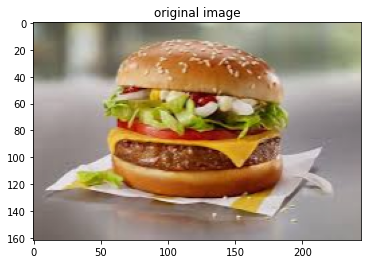

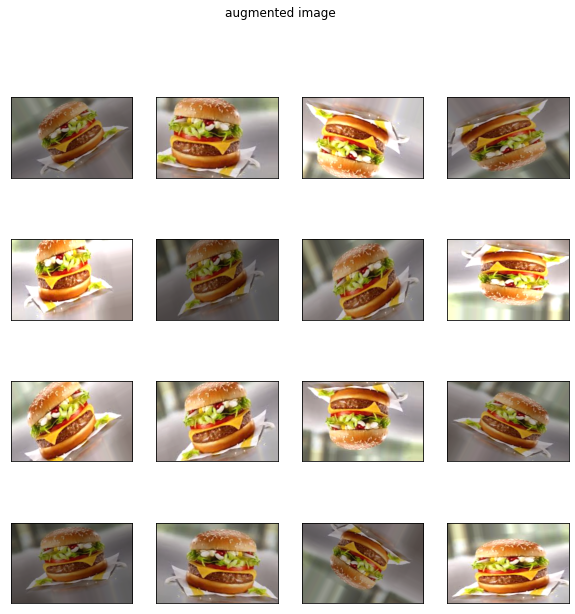

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# 이미지 제네레이터를 선언합니다.
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip = True,
                                   shear_range = 0.5,
                                   brightness_range = [0.5, 1.5], # 밝기를 다르게 함
                                   zoom_range = 0.2,   # 사진의 zoom(확장)을 다르게 한다.
                                   width_shift_range = 0.1,  # 가로로 0.1씩 이동
                                   height_shift_range = 0.1, # 세로로 0.1씩 이동
                                   rotation_range = 30, # 30번 회전시키겠다.
                                   fill_mode = 'nearest'
                                  )

# 햄버거 사진을 불러옵니다.

hamburger = img_to_array(load_img('/content/gdrive/MyDrive/햄버거.png')).astype(np.uint8)
# 햄버거 사진을 numpy array로 변환
plt.figure(); plt.title('original image') # 이미지 제목
plt.imshow(hamburger) # 이미지 출력 


# 제네레이터를 사용해서 이미지를 변환합니다. (여러 햄버거 사진을 생성한다.)
hamburger = hamburger.reshape((1, ) + hamburger.shape)
train_generator = train_datagen.flow(hamburger, batch_size = 1)

fig = plt.figure(figsize = (10, 10))
fig.suptitle('augmented image')


for i in range(16): # 햄버거 사진 16개를 생성하겠다.
    data = next(train_generator) # 제네레이터에게서 이미지를 받아옵니다.
    image = data[0]
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(image, dtype = np.uint8), cmap = 'gray')


plt.show()

In [ ]:
!pwd

/content
